## 사이킷런으로 Linear Regression 모델을 사용해보자

In [2]:
# 패키지를 import
import numpy as np
from sklearn.linear_model import LinearRegression

In [3]:
# 1차원 데이터
# x = [0,1,2,3,4,5,6,7,8,9]
# arange = array + range

x = np.arange(10)
print(x)             # 벡터 형태의 데이터
print(x.shape)

[0 1 2 3 4 5 6 7 8 9]
(10,)


In [4]:
# x.shape => (10, 1)
# 2차원 데이터
# (np.arange(10)) -> reshape(-1,1)

x = np.arange(10).reshape(-1, 1)  # reshpe : 차원변환
print(x)
print(x.shape)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
(10, 1)


In [13]:
# reshape
# 행과 열 中 행에 -1을 입혁 한 경우
# 열을 특정숫자로 고정하고 행을 데이터에 맞게 설정 해 준다.

x = np.arange(12)
x = x.reshape(2,-1)
print(x)

[[ 0  1  2  3  4  5]
 [ 6  7  8  9 10 11]]


In [ ]:
# 연습 끝 ~ 아래 코드부터 새로 분리 !!

In [102]:
# 직선의 방적식을 만들기 위해
# y = 2x + 1 에 대한 데이터셋을 만든다.
# y = wx + b
# w는 2로, b는 1로 가까워 지도록 학습시키기

x = np.arange(10).reshape(-1,1)
y = (2*x + 1).reshape(-1,1)
print(x)
print(y)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [8]
 [9]]
[[ 1]
 [ 3]
 [ 5]
 [ 7]
 [ 9]
 [11]
 [13]
 [15]
 [17]
 [19]]


In [103]:
# 모델 선언(정의)
model = LinearRegression()
model

LinearRegression()

In [105]:
# 학습(Training)
# model.fit(문제, 답)
model.fit(x,y)

LinearRegression()

In [106]:
# 예측
# 학습이 끝나게 되면, 이전에 학습되지 않은 x데이터를 입력해서 예측이 잘 되는지 확인
prediction = model.predict([[10.0]])
prediction

array([[21.]])

In [93]:
prediction = model.predict([[20.3]])
prediction

array([[41.6]])

In [94]:
prediction = model.predict([[15.33]])
prediction

array([[31.66]])

## 데이터 분할하는 메소드를 사용해보자
### train_test_split() 메소드 활용하기

In [35]:
import numpy as np
from sklearn.model_selection import train_test_split


In [40]:
X = [[0,1],[2,3],[4,5],[6,7],[8,9]]
Y = [0,1,2,3,4]

# X의 전체 데이터 5개 中 20%를 test로 주고 싶다.
# train : test = 80% : 20%
# random_state는 random seed값을 의미함

# 데이터(X)만 train_test_split에 넣은 경우
X_train, X_test = train_test_split(X, test_size=0.2, random_state=123)

In [45]:
print(X_train)
print(X_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[[2, 3]]


In [46]:
# 데이터(X)와 레이블(Y)를 함께 train_test_split에 넣은 경우
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=123)

In [48]:
print(X_train)
print(Y_train)
print(X_test)
print(Y_test)

[[6, 7], [8, 9], [0, 1], [4, 5]]
[3, 4, 0, 2]
[[2, 3]]
[1]


# 당뇨병 1년 후 병의 진전도 예측 모델

### scikit-learn 데이터셋 중에 load_diabetes()메소드

In [95]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [96]:
print(diabetes.DESCR)  # DESCR: 데이터셋을 설명(description)하는 함수

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [97]:
# Attribute 불러오기
features = diabetes.feature_names  
print('feature names:', features)

feature names: ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [107]:
print(diabetes.data.shape)    
print(diabetes.target.shape) 

(442, 10)
(442,)


In [111]:
X = diabetes.data
Y = diabetes.target

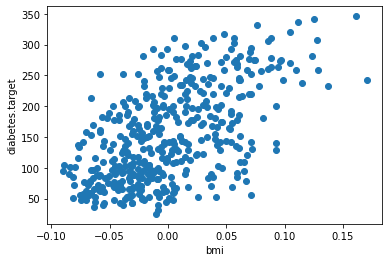

In [112]:
import matplotlib.pyplot as plt

# X[2]: BMI지수, Y: target의 관계를 그래프로 그려보기
plt.scatter(X[:,2], Y) # 모든 행에서 2번째 열(BMI)만 가져오기
plt.xlabel('bmi')
plt.ylabel('diabetes.target')
plt.show()

In [110]:
bmi = X[:,np.newaxis, 2]
print(bmi.shape)
print(bmi[:5])   # 0~4행까지 데이터만 확인

(442, 1)
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]]


In [71]:
# 442개의 데이터를 trian데이터와 test데이터로 나눈다
from sklearn.model_selection import train_test_split

# 442개를 8:2로 나눈다.
bmi_train, bmi_test, y_train, y_test = train_test_split(bmi, Y, test_size=0.2, random_state=123)


In [72]:
print(bmi_train.shape)
print(y_train.shape)
print(bmi_test.shape)
print(y_test.shape)

(353, 1)
(353,)
(89, 1)
(89,)


In [73]:
from sklearn.linear_model import LinearRegression

# model 선언(정의)
model = LinearRegression()

In [78]:
# 모델을 학습(training)
model.fit(bmi_train, y_train)

LinearRegression()

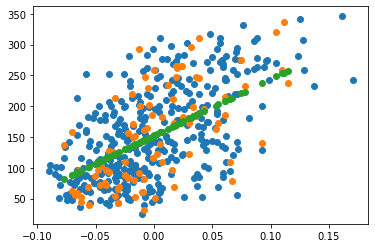

In [115]:
# 학습된 모델을 테스트 (확인)
y_pred = model.predict(bmi_test)
plt.scatter(bmi_train, y_train) # 학습 데이터 (파란색)
plt.scatter(bmi_test, y_test)   # 정답 데이터 (주황색)
plt.scatter(bmi_test, y_pred)   # 예측 데이터 (초록색)